# 1083 Albumin Initial ML

### By: Ian Weimer

In [2]:
import imblearn
print("Imbalanced-Learn", imblearn.__version__)

Imbalanced-Learn 0.7.0


## Imports

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import graphviz
import pydotplus
from imblearn.over_sampling import SMOTE, SMOTENC
pd.set_option('display.max_columns', None)

## Load Albumin Data From Pre-processing and Exploratory Analysis

In [20]:
df = pd.read_csv('C:/Users/Iweimer/Desktop/BB_Git/1083-albumin-data-exploration/ML/Blood_Diseases_Tables/blood_diseases_3M.csv')

In [21]:
# drop insignificant vars

#df.drop(columns = ['bed_size', 'Cirrhosis', 'tenant'], inplace=True)

In [22]:
df.head()

personid                           encounterid  \
0  005729af-49c9-420c-af85-4d226d9192c1  72db8f8a-a7b4-4145-ae60-08f6340af882   
1  00979be8-230b-47ac-8758-808cb2ec44a7  cdc0e5ad-6431-4a97-b4cd-3e7f6f7997ba   
2  00b6ec34-7816-4301-8317-3590b4a948d7  387586e3-a77c-474d-bb69-d144a170fd05   
3  00ef14c9-c421-4d20-ba99-a1b5836336e5  31cb9b95-0455-4444-bb29-4d611d2349f8   
4  010c48a7-25f8-4508-b0ac-628e7418e524  ef3dddf7-6201-423b-8b72-4bc39da31b18   

  condition  albumin_24_hours  ICU  CCI  bl_albumin_value  \
0       D62                 1    1    2               4.0   
1       D64                 0    0    6               1.6   
2       D64                 0    0    1               1.6   
3       D72                 1    1    1               2.6   
4       D84                 0    0    4               2.2   

   albumin_lab_baseline_severity  qSOFA  hospital_free_days  beta_blocker  \
0                            0.0      1                   1             0   
1                            1.0      0                   2             1   
2                            1.0      0                   2             0   
3                            1.0      0                   1             1   
4                            1.0      0                   1             0   

   Cirrhosis_score  nutritional_anemia  SEWS  albumin  LOS_days  
0                0                   0     3        1         2  
1                0                   0     0        1         2  
2                0                   0     0        1         2  
3                0                   0     1        1         2  
4                0                   0     0        1         2

In [23]:
df.drop(columns=['encounterid', 'personid', 'condition', 'albumin', 'LOS_days'], inplace=True)

In [24]:
# df.drop(columns=['ICU', 'qSOFA', 'beta_blocker', 'bl_albumin_value', 'albumin_lab_baseline_severity'], inplace=True)

In [25]:
df.shape

(3413032, 11)

In [26]:
df.describe()

albumin_24_hours           ICU           CCI  bl_albumin_value  \
count      3.413032e+06  3.413032e+06  3.413032e+06      3.413032e+06   
mean       2.606861e-02  6.952997e-02  2.728158e+00      3.520915e+00   
std        1.593394e-01  2.543532e-01  2.589764e+00      7.575164e-01   
min        0.000000e+00  0.000000e+00  0.000000e+00      7.000000e-05   
25%        0.000000e+00  0.000000e+00  1.000000e+00      3.000000e+00   
50%        0.000000e+00  0.000000e+00  2.000000e+00      3.600000e+00   
75%        0.000000e+00  0.000000e+00  4.000000e+00      4.100000e+00   
max        1.000000e+00  1.000000e+00  2.300000e+01      2.000000e+01   

       albumin_lab_baseline_severity         qSOFA  hospital_free_days  \
count                   3.413032e+06  3.413032e+06        3.413032e+06   
mean                    2.182265e-01  2.441996e-01        9.907672e-01   
std                     4.130421e-01  5.004336e-01        8.200952e-01   
min                     0.000000e+00  0.000000e+00        0.000000e+00   
25%                     0.000000e+00  0.000000e+00        0.000000e+00   
50%                     0.000000e+00  0.000000e+00        1.000000e+00   
75%                     0.000000e+00  0.000000e+00        2.000000e+00   
max                     1.000000e+00  3.000000e+00        2.000000e+00   

       beta_blocker  Cirrhosis_score  nutritional_anemia          SEWS  
count  3.413032e+06     3.413032e+06        3.413032e+06  3.413032e+06  
mean   1.930574e-01     1.015889e-01        2.391237e-01  6.980216e-01  
std    3.946977e-01     3.021069e-01        4.265485e-01  1.283177e+00  
min    0.000000e+00     0.000000e+00        0.000000e+00  0.000000e+00  
25%    0.000000e+00     0.000000e+00        0.000000e+00  0.000000e+00  
50%    0.000000e+00     0.000000e+00        0.000000e+00  0.000000e+00  
75%    0.000000e+00     0.000000e+00        0.000000e+00  1.000000e+00  
max    1.000000e+00     1.000000e+00        1.000000e+00  1.700000e+01

In [27]:
#df = df[['CCI', 'unknown_albumin_type', 'albumin_24hrs', '25_percent_albumin', 'LOS_days']]

In [28]:
#df['LOS_days'] = df['LOS_hours']/24
#df.drop(columns=['LOS_hours'], inplace=True)

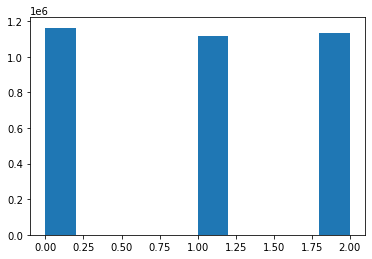

In [29]:
plt.hist(df['hospital_free_days']);

In [30]:
df['hospital_free_days'].value_counts()

0    1163629
2    1132117
1    1117286
Name: hospital_free_days, dtype: int64

## Modeling

In [31]:
# establish target feature, LOS_days, as y feature
y = df['hospital_free_days']
# drop target feature from features dataframe
X = df.drop(columns = ['hospital_free_days'], axis = 1)
# save dataframe column titles to list for reassigning after min max scale 
cols = X.columns

In [32]:
cols

Index(['albumin_24_hours', 'ICU', 'CCI', 'bl_albumin_value',
       'albumin_lab_baseline_severity', 'qSOFA', 'beta_blocker',
       'Cirrhosis_score', 'nutritional_anemia', 'SEWS'],
      dtype='object')

## Standardize Data

In [33]:
#cols = X.columns

#instantiate min-max scaling object
#mm = MinMaxScaler()
# fit and transform feature dataframe
#X = pd.DataFrame(mm.fit_transform(X))
# reassign column names so new dataframe has corresponding names
#X.columns = cols

In [34]:
X.head()

albumin_24_hours  ICU  CCI  bl_albumin_value  \
0                 1    1    2               4.0   
1                 0    0    6               1.6   
2                 0    0    1               1.6   
3                 1    1    1               2.6   
4                 0    0    4               2.2   

   albumin_lab_baseline_severity  qSOFA  beta_blocker  Cirrhosis_score  \
0                            0.0      1             0                0   
1                            1.0      0             1                0   
2                            1.0      0             0                0   
3                            1.0      0             1                0   
4                            1.0      0             0                0   

   nutritional_anemia  SEWS  
0                   0     3  
1                   0     0  
2                   0     0  
3                   0     1  
4                   0     0

In [35]:
X.shape

(3413032, 10)

## Train Test Split

In [36]:
#sm = SMOTENC(random_state=42, categorical_features = [0, 1, 2, 3, 4, 5, \
#                                                     6, 7, 8, 9, 10])
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#X_train, y_train = sm.fit_resample(X_train, y_train)

In [37]:
#sm = SMOTEN(random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#X_train, y_train = sm.fit_resample(X_train, y_train)

In [38]:
# train test split from target feature series and the predicting feature dataframe (set test size to 20% of data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 33)

In [39]:
y_train.value_counts()

0    930547
2    905971
1    893907
Name: hospital_free_days, dtype: int64

## Multinomial Logistic Regression

In [40]:
# instantiate a Logistic Regression model without an intercept, 'liblinear' solver method
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs')
# fit the model to X and y training sets
logreg.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial')

Feature: albumin_24_hours Score: 0.13396
Feature: ICU Score: 0.02532
Feature: CCI Score: 0.09665
Feature: bl_albumin_value Score: -0.06961
Feature: albumin_lab_baseline_severity Score: -0.05002
Feature: qSOFA Score: 0.03724
Feature: beta_blocker Score: -0.23640
Feature: Cirrhosis_score Score: 0.05579
Feature: nutritional_anemia Score: 0.07290
Feature: SEWS Score: 0.02346


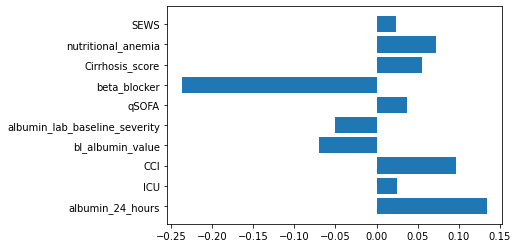

In [41]:
# general quick feature importance
# get coefficients for importance
# coefficients represent the log odds that an observation is in the
# target class, given the values of its X variables

importance = logreg.coef_[0]
# summarize feature importance
labels = []
for i,v in enumerate(importance):
    print('Feature: %s Score: %.5f' % (cols[i], v))
    labels.append(cols[i])
# plot feature importance
pyplot.barh(labels, importance)
pyplot.show()

                               Importance
albumin_24_hours                 1.143344
CCI                              1.101471
nutritional_anemia               1.075622
Cirrhosis_score                  1.057374
qSOFA                            1.037944
ICU                              1.025642
SEWS                             1.023738
albumin_lab_baseline_severity    0.951211
bl_albumin_value                 0.932759
beta_blocker                     0.789463


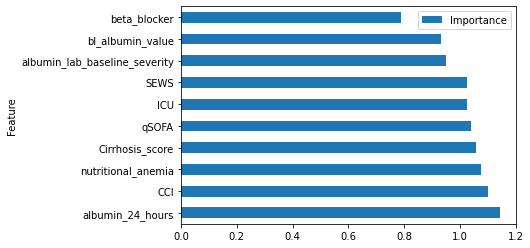

In [42]:
# convert log odds into regular odds with exponentiation
# np.exp()
# and list values, visualize in bar plot

odds = np.exp(logreg.coef_[0])
feature_importance = \
            pd.DataFrame(odds, 
             X.columns, 
             columns=['Importance'])\
            .sort_values(by='Importance', ascending=False)
        
ax = feature_importance.plot.barh(xlabel='Feature', ylabel='Importance')
print(feature_importance)
plt.show()

In [43]:
# Generate model prediction data for train and test sets
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

In [44]:
# confusion_matrix for actual y_train and predicted y_train
cnf_matrix = confusion_matrix(y_train, y_hat_train)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[456671 130853 343023]
 [319909 161814 412184]
 [264189 136818 504964]]


In [45]:
# model metrics for training set (Precision, Recall, Accuracy, F1)
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

           0       0.44      0.49      0.46    930547
           1       0.38      0.18      0.24    893907
           2       0.40      0.56      0.47    905971

    accuracy                           0.41   2730425
   macro avg       0.41      0.41      0.39   2730425
weighted avg       0.41      0.41      0.39   2730425



In [46]:
# confusion_matrix for actual y_test and predicted y_test
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[114069  32981  86032]
 [ 80277  40359 102743]
 [ 66280  34157 125709]]


In [47]:
# model metrics for test set (Precision, Recall, Accuracy, F1)
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.44      0.49      0.46    233082
           1       0.38      0.18      0.24    223379
           2       0.40      0.56      0.47    226146

    accuracy                           0.41    682607
   macro avg       0.40      0.41      0.39    682607
weighted avg       0.40      0.41      0.39    682607



## 1: Decision Tree (Max Depth=3)

In [48]:
# instantiate a decision tree model
# max_depth limits depth of tree, helps prevent overfitting training data
dt = tree.DecisionTreeClassifier(max_depth=3)
# fit the model to X and y training sets
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

Feature: albumin_24_hours Score: 0.00000
Feature: ICU Score: 0.00000
Feature: CCI Score: 0.87702
Feature: bl_albumin_value Score: 0.00000
Feature: albumin_lab_baseline_severity Score: 0.00000
Feature: qSOFA Score: 0.00000
Feature: beta_blocker Score: 0.08935
Feature: Cirrhosis_score Score: 0.00000
Feature: nutritional_anemia Score: 0.03363
Feature: SEWS Score: 0.00000


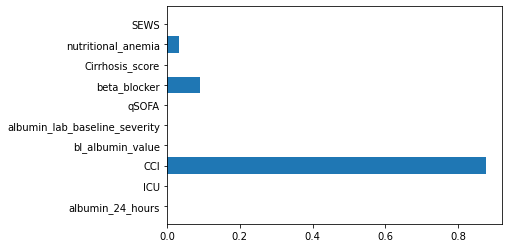

In [49]:
# get importance from decision tree model
importance = dt.feature_importances_
# summarize feature importance
labels = []
for i,v in enumerate(importance):
    print('Feature: %s Score: %.5f' % (cols[i], v))
    labels.append(cols[i])
# plot feature importance
pyplot.barh(labels, importance)
pyplot.show()

In [50]:
# generate model prediction data for train and test sets
y_hat_train = dt.predict(X_train)
y_hat_test = dt.predict(X_test)

In [51]:
# confusion_matrix for actual y_train and predicted y_train
cnf_matrix = confusion_matrix(y_train, y_hat_train)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[577218  32709 320620]
 [428811  42643 422453]
 [348774  37560 519637]]


In [52]:
# model metrics for train set (Precision, Recall, Accuracy, F1)
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

           0       0.43      0.62      0.51    930547
           1       0.38      0.05      0.08    893907
           2       0.41      0.57      0.48    905971

    accuracy                           0.42   2730425
   macro avg       0.41      0.41      0.36   2730425
weighted avg       0.41      0.42      0.36   2730425



In [53]:
# confusion_matrix for actual y_test and predicted y_test
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[144402   8318  80362]
 [107361  10560 105458]
 [ 87347   9444 129355]]


In [54]:
# model metrics for test set (Precision, Recall, Accuracy, F1)
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.43      0.62      0.50    233082
           1       0.37      0.05      0.08    223379
           2       0.41      0.57      0.48    226146

    accuracy                           0.42    682607
   macro avg       0.40      0.41      0.36    682607
weighted avg       0.40      0.42      0.36    682607



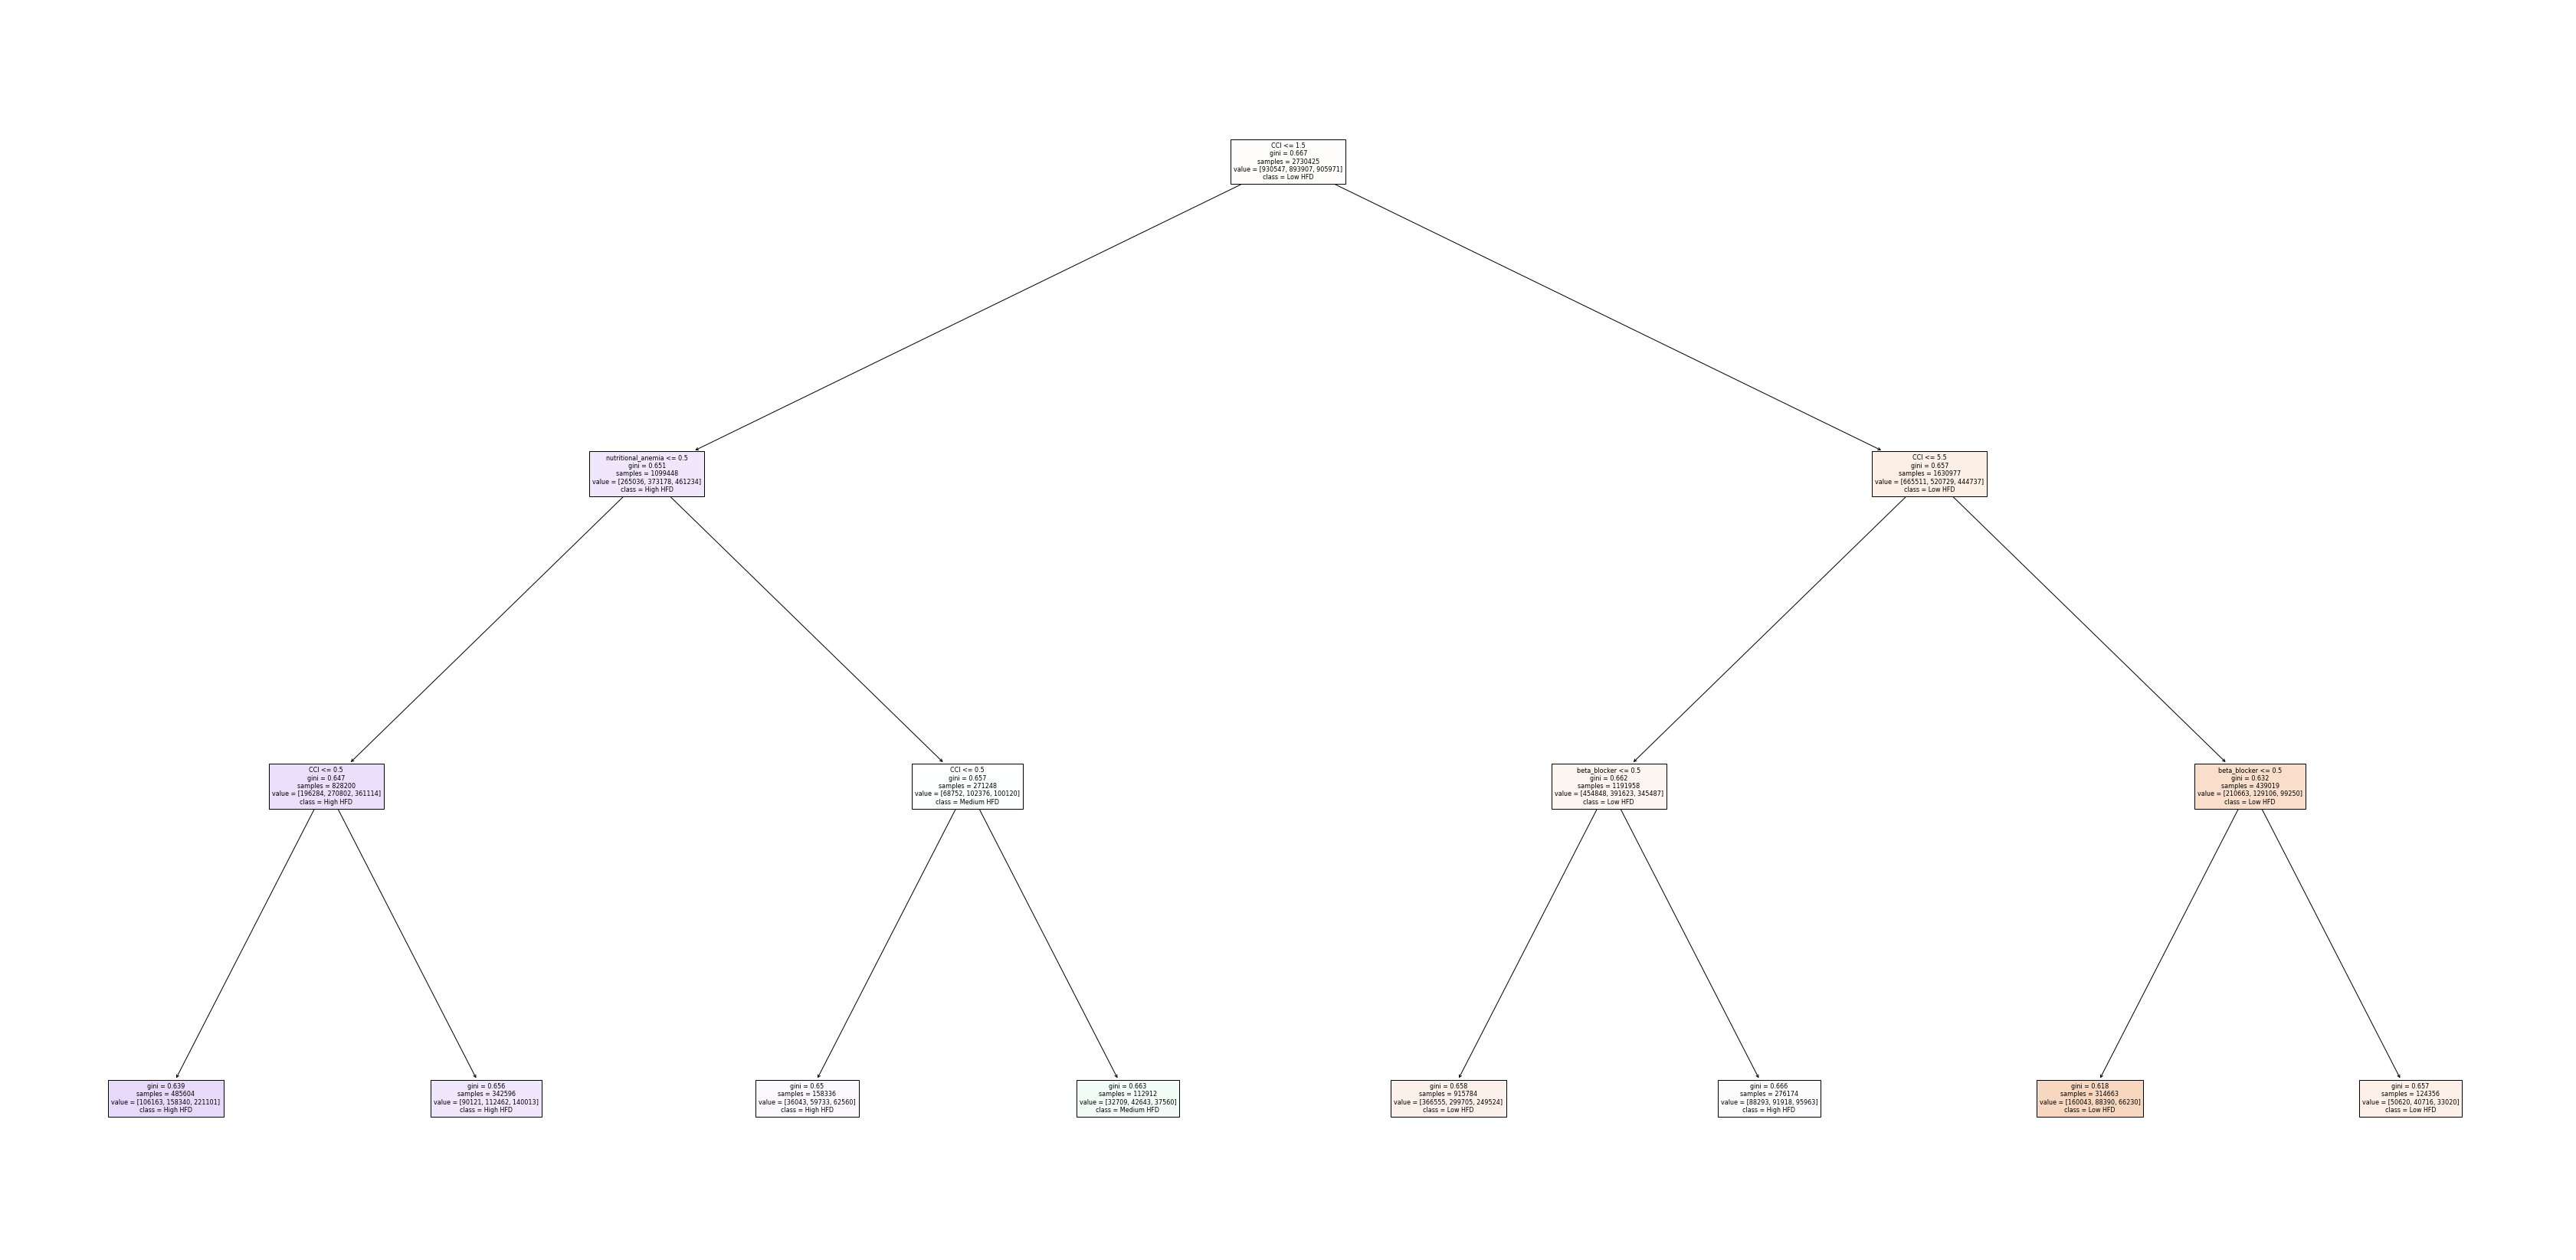

In [55]:
feature_names = X_train.columns.tolist()
class_names = ['Low HFD', 'Medium HFD', 'High HFD']

fig = plt.figure(figsize=(60,30))
_ = tree.plot_tree(dt,
                   fontsize=8,
                   feature_names=feature_names,  
                   class_names=class_names,
                   filled=True)

In [347]:
pwd

'C:\\Users\\Iweimer\\Desktop\\BB_Git\\1083-albumin-data-exploration\\ML\\Blood_Diseases_Cohort'

In [348]:
dot_data = tree.export_graphviz(dt, out_file=None, 
                     feature_names=feature_names,  
                     class_names=class_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.write_png('LOS_DT_D3_MATCHED_178K.png')

True

## 2: Decision Tree (Max Depth=4)

In [64]:
# instantiate a decision tree model
# max_depth limits depth of tree, helps prevent overfitting training data
dt = tree.DecisionTreeClassifier(max_depth=4)
# fit the model to X and y training sets
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

Feature: albumin_24_hours Score: 0.00000
Feature: ICU Score: 0.00000
Feature: CCI Score: 0.83214
Feature: bl_albumin_value Score: 0.02351
Feature: albumin_lab_baseline_severity Score: 0.00000
Feature: qSOFA Score: 0.00000
Feature: beta_blocker Score: 0.09217
Feature: Cirrhosis_score Score: 0.00000
Feature: nutritional_anemia Score: 0.03173
Feature: SEWS Score: 0.02045


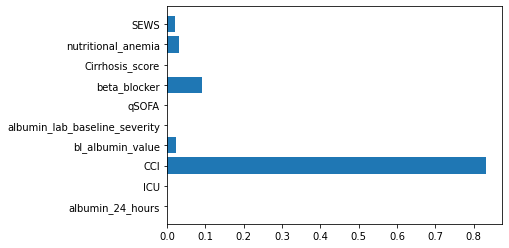

In [65]:
# get importance from decision tree model
importance = dt.feature_importances_
# summarize feature importance
labels = []
for i,v in enumerate(importance):
    print('Feature: %s Score: %.5f' % (cols[i], v))
    labels.append(cols[i])
# plot feature importance
pyplot.barh(labels, importance)
pyplot.show()

In [66]:
# generate model prediction data for train and test sets
y_hat_train = dt.predict(X_train)
y_hat_test = dt.predict(X_test)

In [67]:
# confusion_matrix for actual y_train and predicted y_train
cnf_matrix = confusion_matrix(y_train, y_hat_train)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[596932  32709 300906]
 [446408  42643 404856]
 [364983  37560 503428]]


In [68]:
# model metrics for train set (Precision, Recall, Accuracy, F1)
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

           0       0.42      0.64      0.51    930547
           1       0.38      0.05      0.08    893907
           2       0.42      0.56      0.48    905971

    accuracy                           0.42   2730425
   macro avg       0.41      0.41      0.36   2730425
weighted avg       0.41      0.42      0.36   2730425



In [69]:
# confusion_matrix for actual y_test and predicted y_test
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[149339   8318  75425]
 [111772  10560 101047]
 [ 91481   9444 125221]]


In [70]:
# model metrics for test set (Precision, Recall, Accuracy, F1)
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.42      0.64      0.51    233082
           1       0.37      0.05      0.08    223379
           2       0.42      0.55      0.47    226146

    accuracy                           0.42    682607
   macro avg       0.40      0.41      0.36    682607
weighted avg       0.40      0.42      0.36    682607



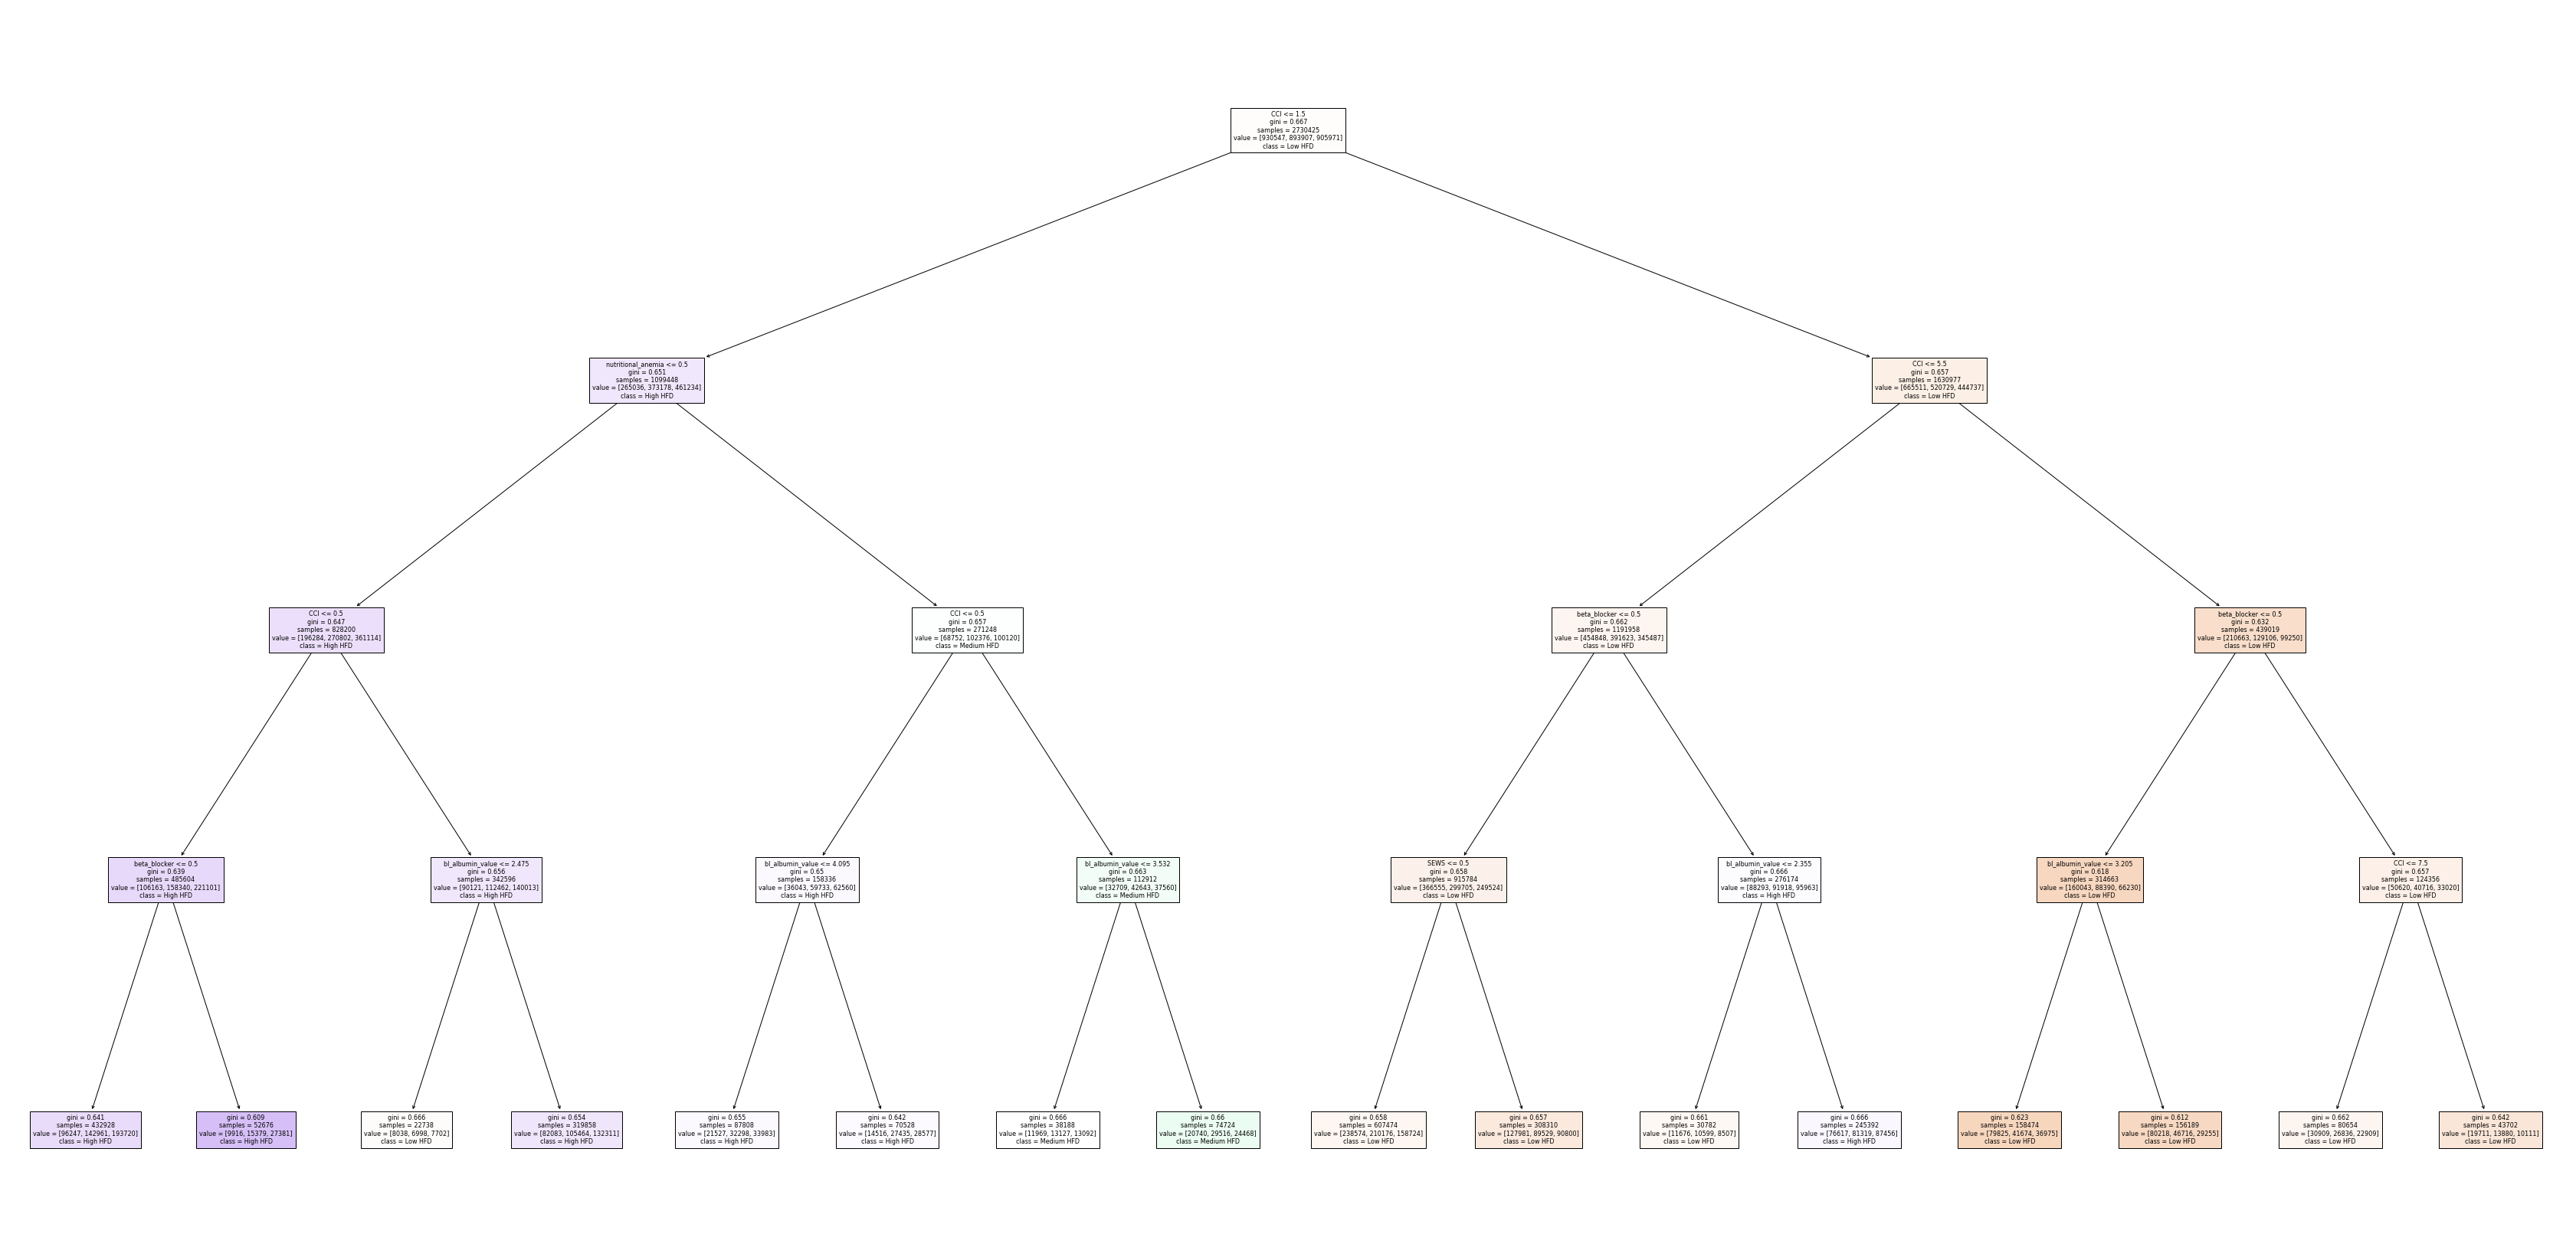

In [71]:
feature_names = X_train.columns.tolist()
class_names = ['Low HFD', 'Medium HFD', 'High HFD']

fig = plt.figure(figsize=(60,30))
_ = tree.plot_tree(dt,
                   fontsize=8,
                   feature_names=feature_names,  
                   class_names=class_names,
                   filled=True)

In [383]:
dot_data = tree.export_graphviz(dt, out_file=None, 
                     feature_names=feature_names,  
                     class_names=class_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.write_png('LOS_DT_D4_MATCHED_178K.png')

True

## 3: Decision Tree 

In [56]:
# instantiate a decision tree model
# max_depth limits depth of tree, helps prevent overfitting training data
# max_depth 5
dt = tree.DecisionTreeClassifier(max_depth=5, min_samples_leaf=100)
# fit the model to X and y training sets
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=100)

Feature: albumin_24_hours Score: 0.00000
Feature: ICU Score: 0.00000
Feature: CCI Score: 0.79576
Feature: bl_albumin_value Score: 0.02863
Feature: albumin_lab_baseline_severity Score: 0.00000
Feature: qSOFA Score: 0.00598
Feature: beta_blocker Score: 0.09016
Feature: Cirrhosis_score Score: 0.00000
Feature: nutritional_anemia Score: 0.04505
Feature: SEWS Score: 0.03442


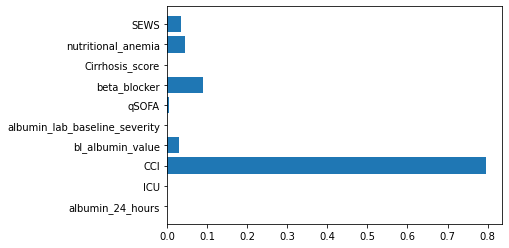

In [57]:
# get importance from decision tree model
importance = dt.feature_importances_
# summarize feature importance
labels = []
for i,v in enumerate(importance):
    print('Feature: %s Score: %.5f' % (cols[i], v))
    labels.append(cols[i])
# plot feature importance
pyplot.barh(labels, importance)
pyplot.show()

In [58]:
# generate model prediction data for train and test sets
y_hat_train = dt.predict(X_train)
y_hat_test = dt.predict(X_test)

In [59]:
# confusion_matrix for actual y_train and predicted y_train
cnf_matrix = confusion_matrix(y_train, y_hat_train)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[607865  33807 288875]
 [457060  44743 392104]
 [373432  39205 493334]]


In [60]:
# model metrics for train set (Precision, Recall, Accuracy, F1)
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

           0       0.42      0.65      0.51    930547
           1       0.38      0.05      0.09    893907
           2       0.42      0.54      0.47    905971

    accuracy                           0.42   2730425
   macro avg       0.41      0.42      0.36   2730425
weighted avg       0.41      0.42      0.36   2730425



In [61]:
# confusion_matrix for actual y_test and predicted y_test
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[152129   8528  72425]
 [114469  11059  97851]
 [ 93449   9900 122797]]


In [62]:
# model metrics for test set (Precision, Recall, Accuracy, F1)
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.42      0.65      0.51    233082
           1       0.38      0.05      0.09    223379
           2       0.42      0.54      0.47    226146

    accuracy                           0.42    682607
   macro avg       0.41      0.42      0.36    682607
weighted avg       0.41      0.42      0.36    682607



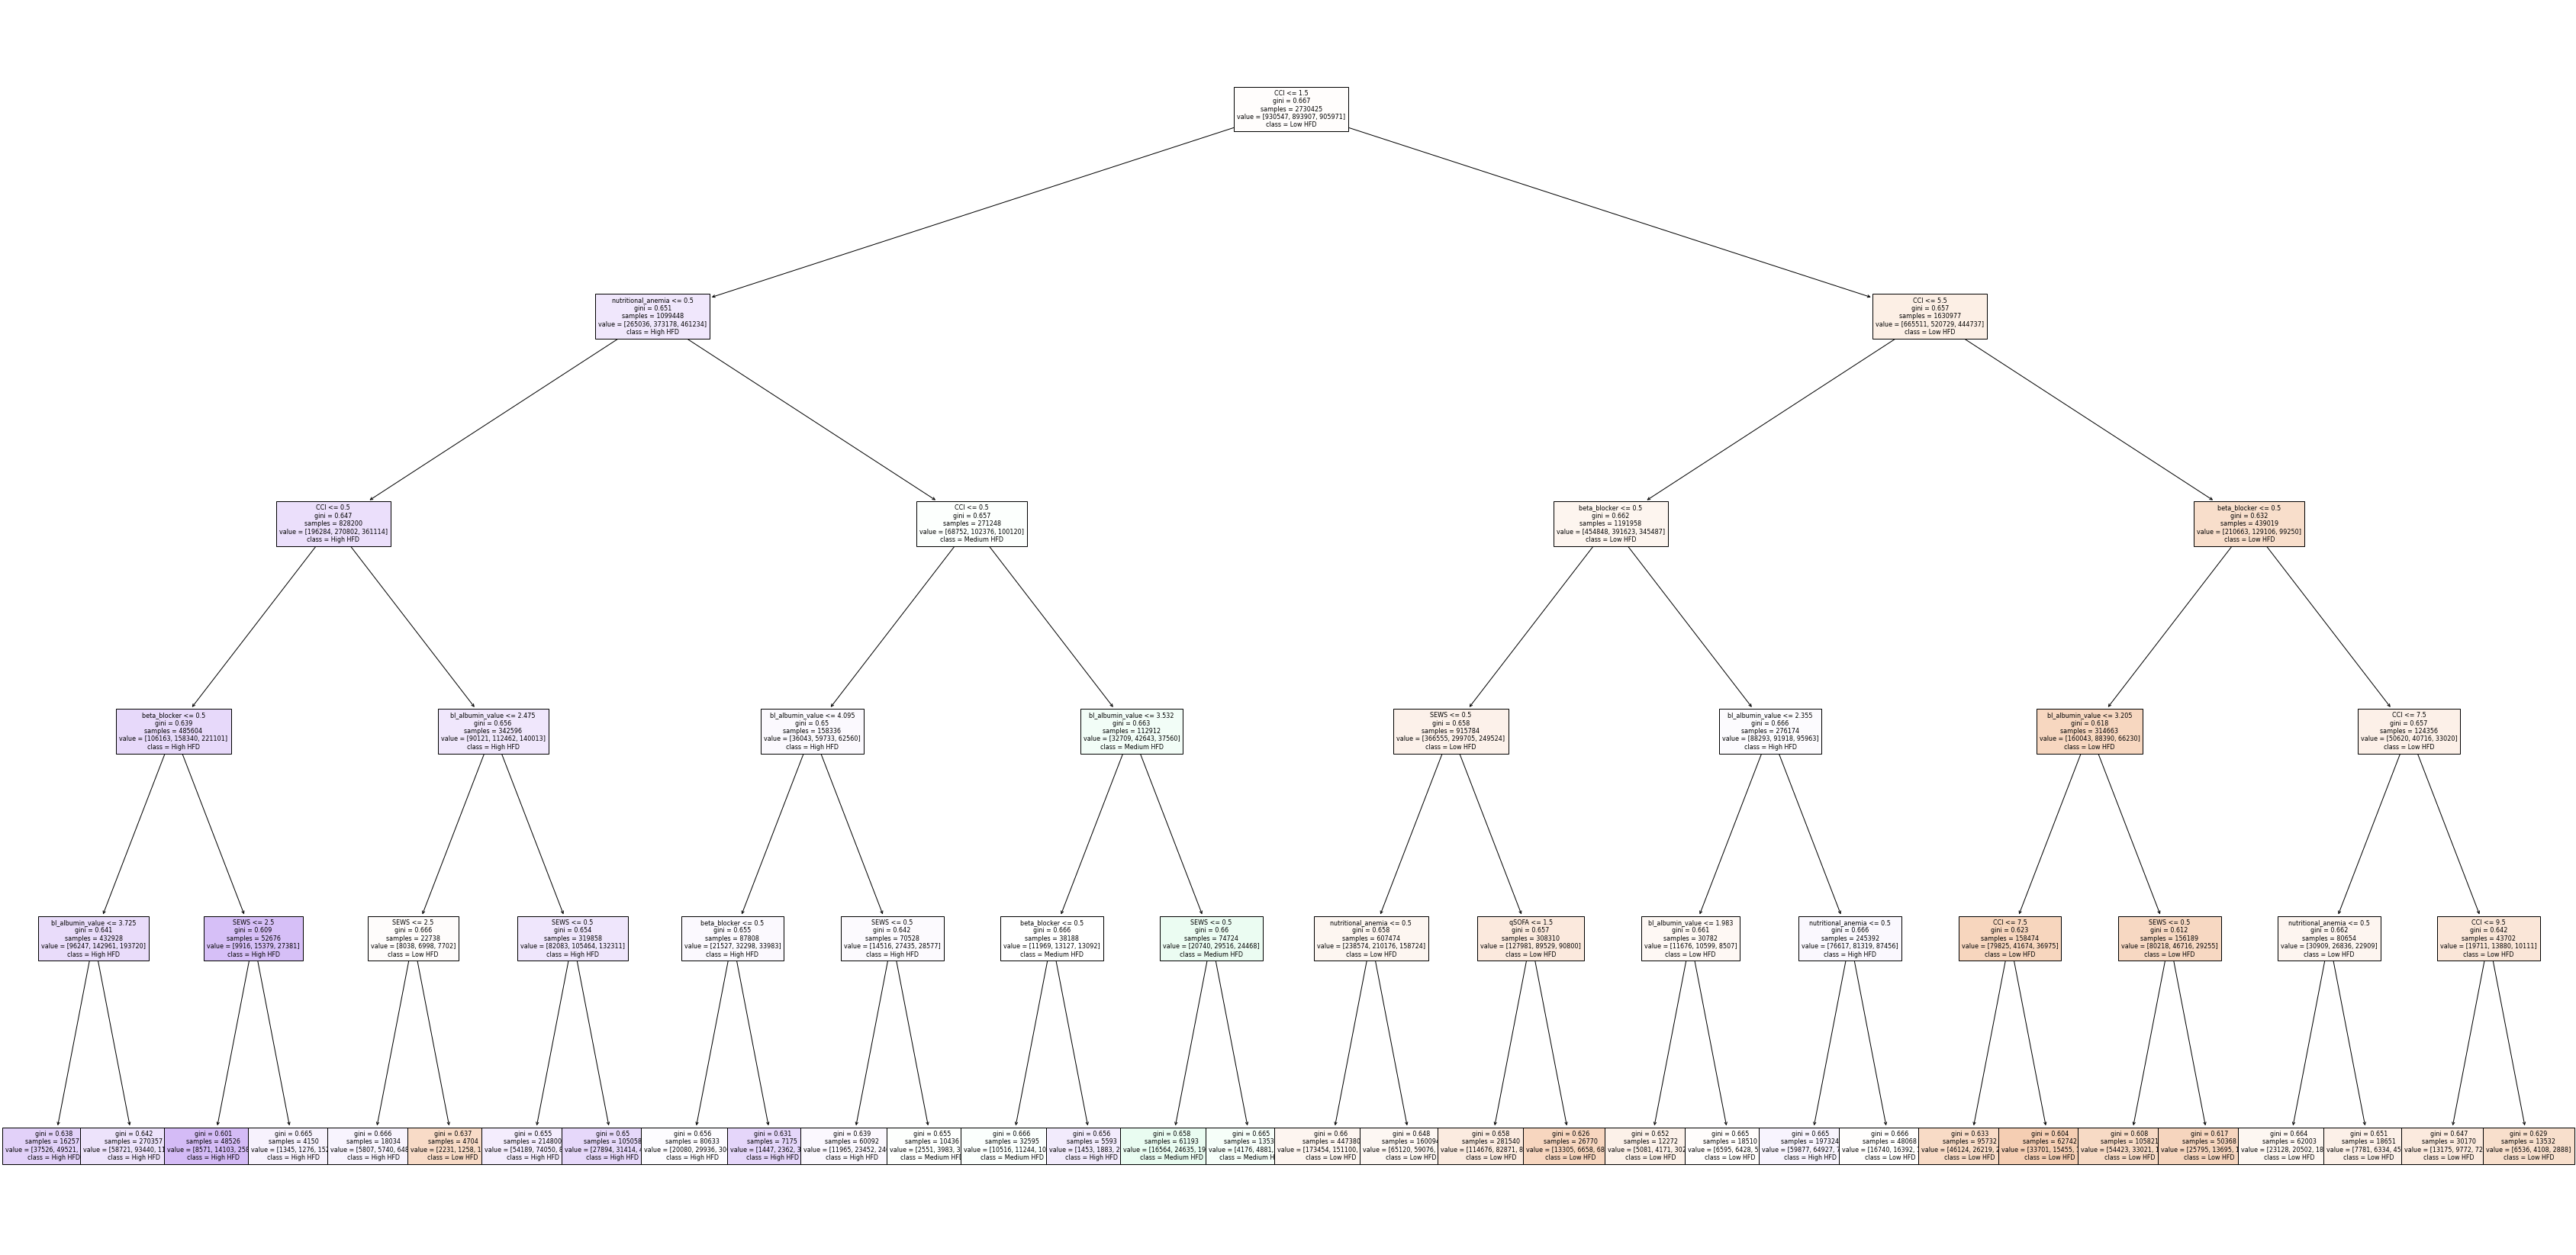

In [63]:
feature_names = X_train.columns.tolist()
class_names = ['Low HFD', 'Medium HFD', 'High HFD']

fig = plt.figure(figsize=(60,30))
_ = tree.plot_tree(dt,
                   fontsize=8,
                   feature_names=feature_names,  
                   class_names=class_names,
                   filled=True)

In [392]:
dot_data = tree.export_graphviz(dt, out_file=None, 
                     feature_names=feature_names,  
                     class_names=class_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.write_png('LOS_DT_D5_MATCHED_178K.png')

True

## 4: Decision Tree 

In [72]:
# instantiate a decision tree model
# max_depth limits depth of tree, helps prevent overfitting training data
# max_depth 5
dt = tree.DecisionTreeClassifier(max_depth=6, min_samples_leaf=100)
# fit the model to X and y training sets
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=100)

Feature: albumin_24_hours Score: 0.00000
Feature: ICU Score: 0.00201
Feature: CCI Score: 0.76942
Feature: bl_albumin_value Score: 0.03703
Feature: albumin_lab_baseline_severity Score: 0.00000
Feature: qSOFA Score: 0.01088
Feature: beta_blocker Score: 0.09079
Feature: Cirrhosis_score Score: 0.00122
Feature: nutritional_anemia Score: 0.04772
Feature: SEWS Score: 0.04093


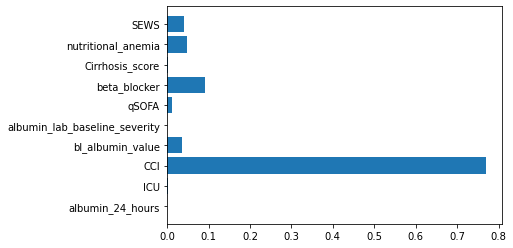

In [73]:
# get importance from decision tree model
importance = dt.feature_importances_
# summarize feature importance
labels = []
for i,v in enumerate(importance):
    print('Feature: %s Score: %.5f' % (cols[i], v))
    labels.append(cols[i])
# plot feature importance
pyplot.barh(labels, importance)
pyplot.show()

In [74]:
# generate model prediction data for train and test sets
y_hat_train = dt.predict(X_train)
y_hat_test = dt.predict(X_test)

In [75]:
# confusion_matrix for actual y_train and predicted y_train
cnf_matrix = confusion_matrix(y_train, y_hat_train)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[578435  79887 272225]
 [425365 101250 367292]
 [350731  86061 469179]]


In [76]:
# model metrics for train set (Precision, Recall, Accuracy, F1)
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

           0       0.43      0.62      0.51    930547
           1       0.38      0.11      0.17    893907
           2       0.42      0.52      0.47    905971

    accuracy                           0.42   2730425
   macro avg       0.41      0.42      0.38   2730425
weighted avg       0.41      0.42      0.38   2730425



In [77]:
# confusion_matrix for actual y_test and predicted y_test
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[144708  20250  68124]
 [106529  25109  91741]
 [ 87789  21544 116813]]


In [78]:
# model metrics for test set (Precision, Recall, Accuracy, F1)
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.43      0.62      0.51    233082
           1       0.38      0.11      0.17    223379
           2       0.42      0.52      0.46    226146

    accuracy                           0.42    682607
   macro avg       0.41      0.42      0.38    682607
weighted avg       0.41      0.42      0.38    682607



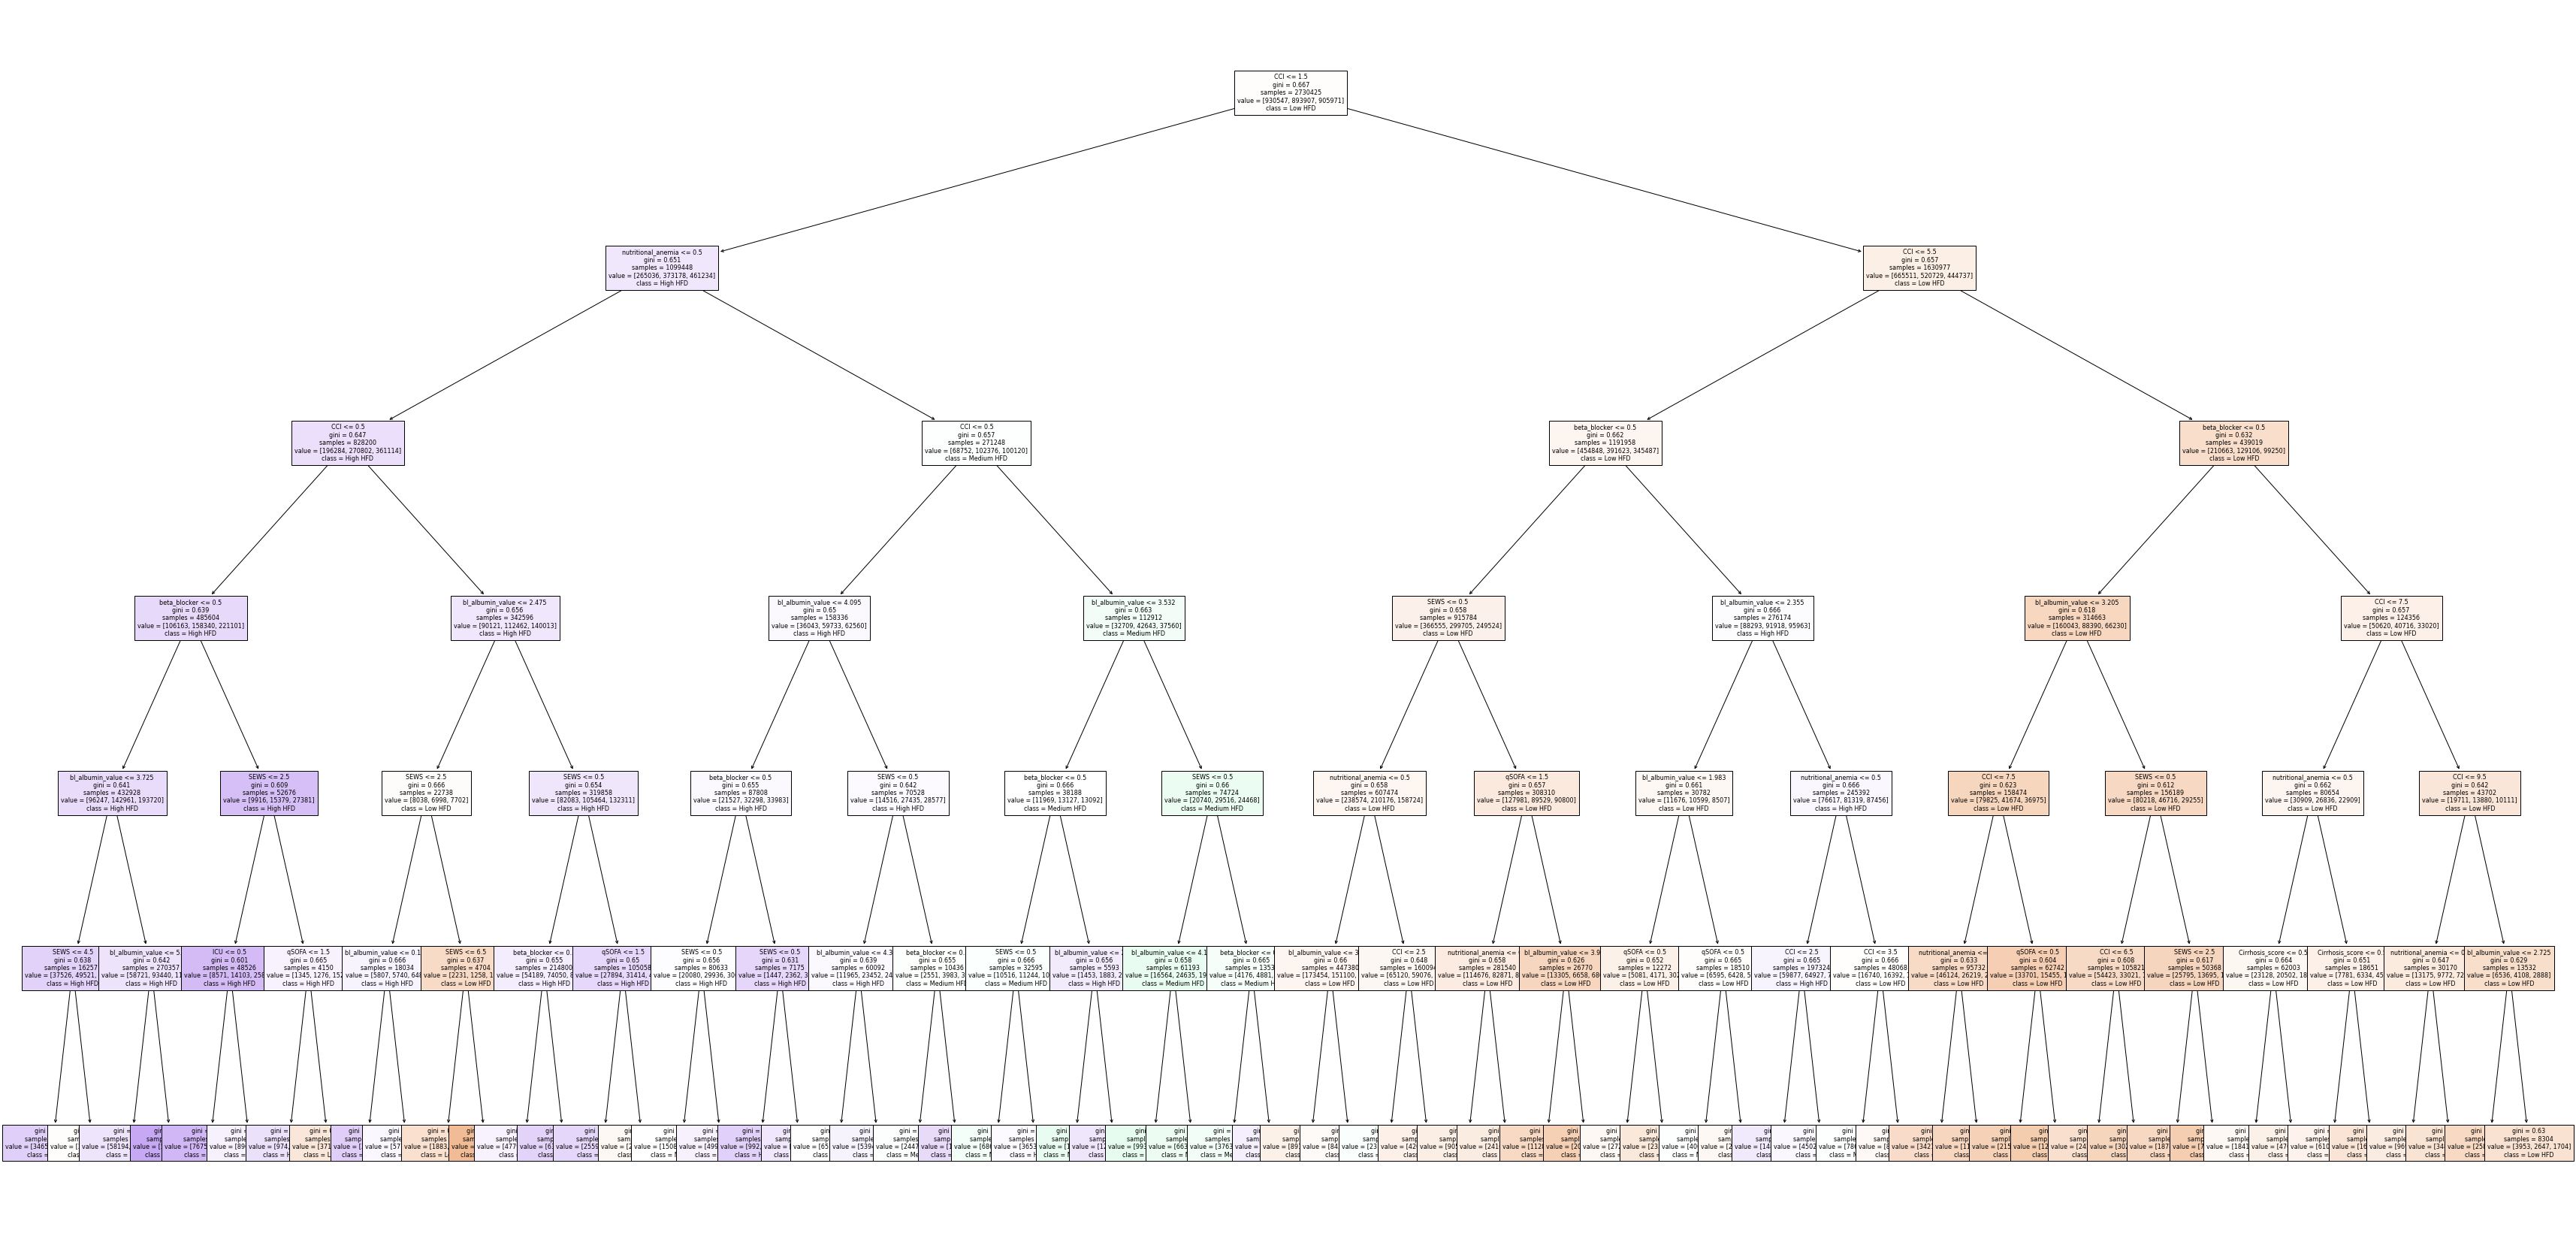

In [79]:
feature_names = X_train.columns.tolist()
class_names = ['Low HFD', 'Medium HFD', 'High HFD']

fig = plt.figure(figsize=(60,30))
_ = tree.plot_tree(dt,
                   fontsize=8,
                   feature_names=feature_names,  
                   class_names=class_names,
                   filled=True)

In [86]:
dot_data = tree.export_graphviz(dt, out_file=None, 
                     feature_names=feature_names,  
                     class_names=class_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.write_png('HFD_DT_D6_MATCHED_178K.png')

True

## 5: Decision Tree 

In [80]:
# instantiate a decision tree model
# max_depth limits depth of tree, helps prevent overfitting training data
# max_depth 5
dt = tree.DecisionTreeClassifier(max_depth=7, min_samples_leaf=100)
# fit the model to X and y training sets
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=100)

Feature: albumin_24_hours Score: 0.00396
Feature: ICU Score: 0.00396
Feature: CCI Score: 0.74496
Feature: bl_albumin_value Score: 0.05733
Feature: albumin_lab_baseline_severity Score: 0.00000
Feature: qSOFA Score: 0.01086
Feature: beta_blocker Score: 0.08816
Feature: Cirrhosis_score Score: 0.00180
Feature: nutritional_anemia Score: 0.04777
Feature: SEWS Score: 0.04119


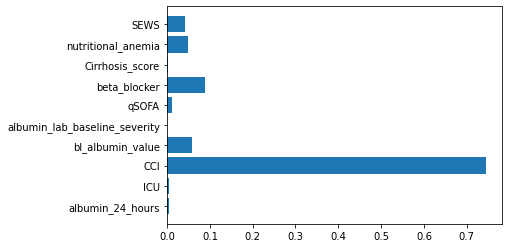

In [81]:
# get importance from decision tree model
importance = dt.feature_importances_
# summarize feature importance
labels = []
for i,v in enumerate(importance):
    print('Feature: %s Score: %.5f' % (cols[i], v))
    labels.append(cols[i])
# plot feature importance
pyplot.barh(labels, importance)
pyplot.show()

In [82]:
# generate model prediction data for train and test sets
y_hat_train = dt.predict(X_train)
y_hat_test = dt.predict(X_test)

In [83]:
# confusion_matrix for actual y_train and predicted y_train
cnf_matrix = confusion_matrix(y_train, y_hat_train)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[560791  92823 276933]
 [405663 113155 375089]
 [334533  92125 479313]]


In [84]:
# model metrics for train set (Precision, Recall, Accuracy, F1)
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

           0       0.43      0.60      0.50    930547
           1       0.38      0.13      0.19    893907
           2       0.42      0.53      0.47    905971

    accuracy                           0.42   2730425
   macro avg       0.41      0.42      0.39   2730425
weighted avg       0.41      0.42      0.39   2730425



In [85]:
# confusion_matrix for actual y_test and predicted y_test
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[140248  23461  69373]
 [101608  28105  93666]
 [ 83865  23050 119231]]


In [86]:
# model metrics for test set (Precision, Recall, Accuracy, F1)
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.43      0.60      0.50    233082
           1       0.38      0.13      0.19    223379
           2       0.42      0.53      0.47    226146

    accuracy                           0.42    682607
   macro avg       0.41      0.42      0.39    682607
weighted avg       0.41      0.42      0.39    682607



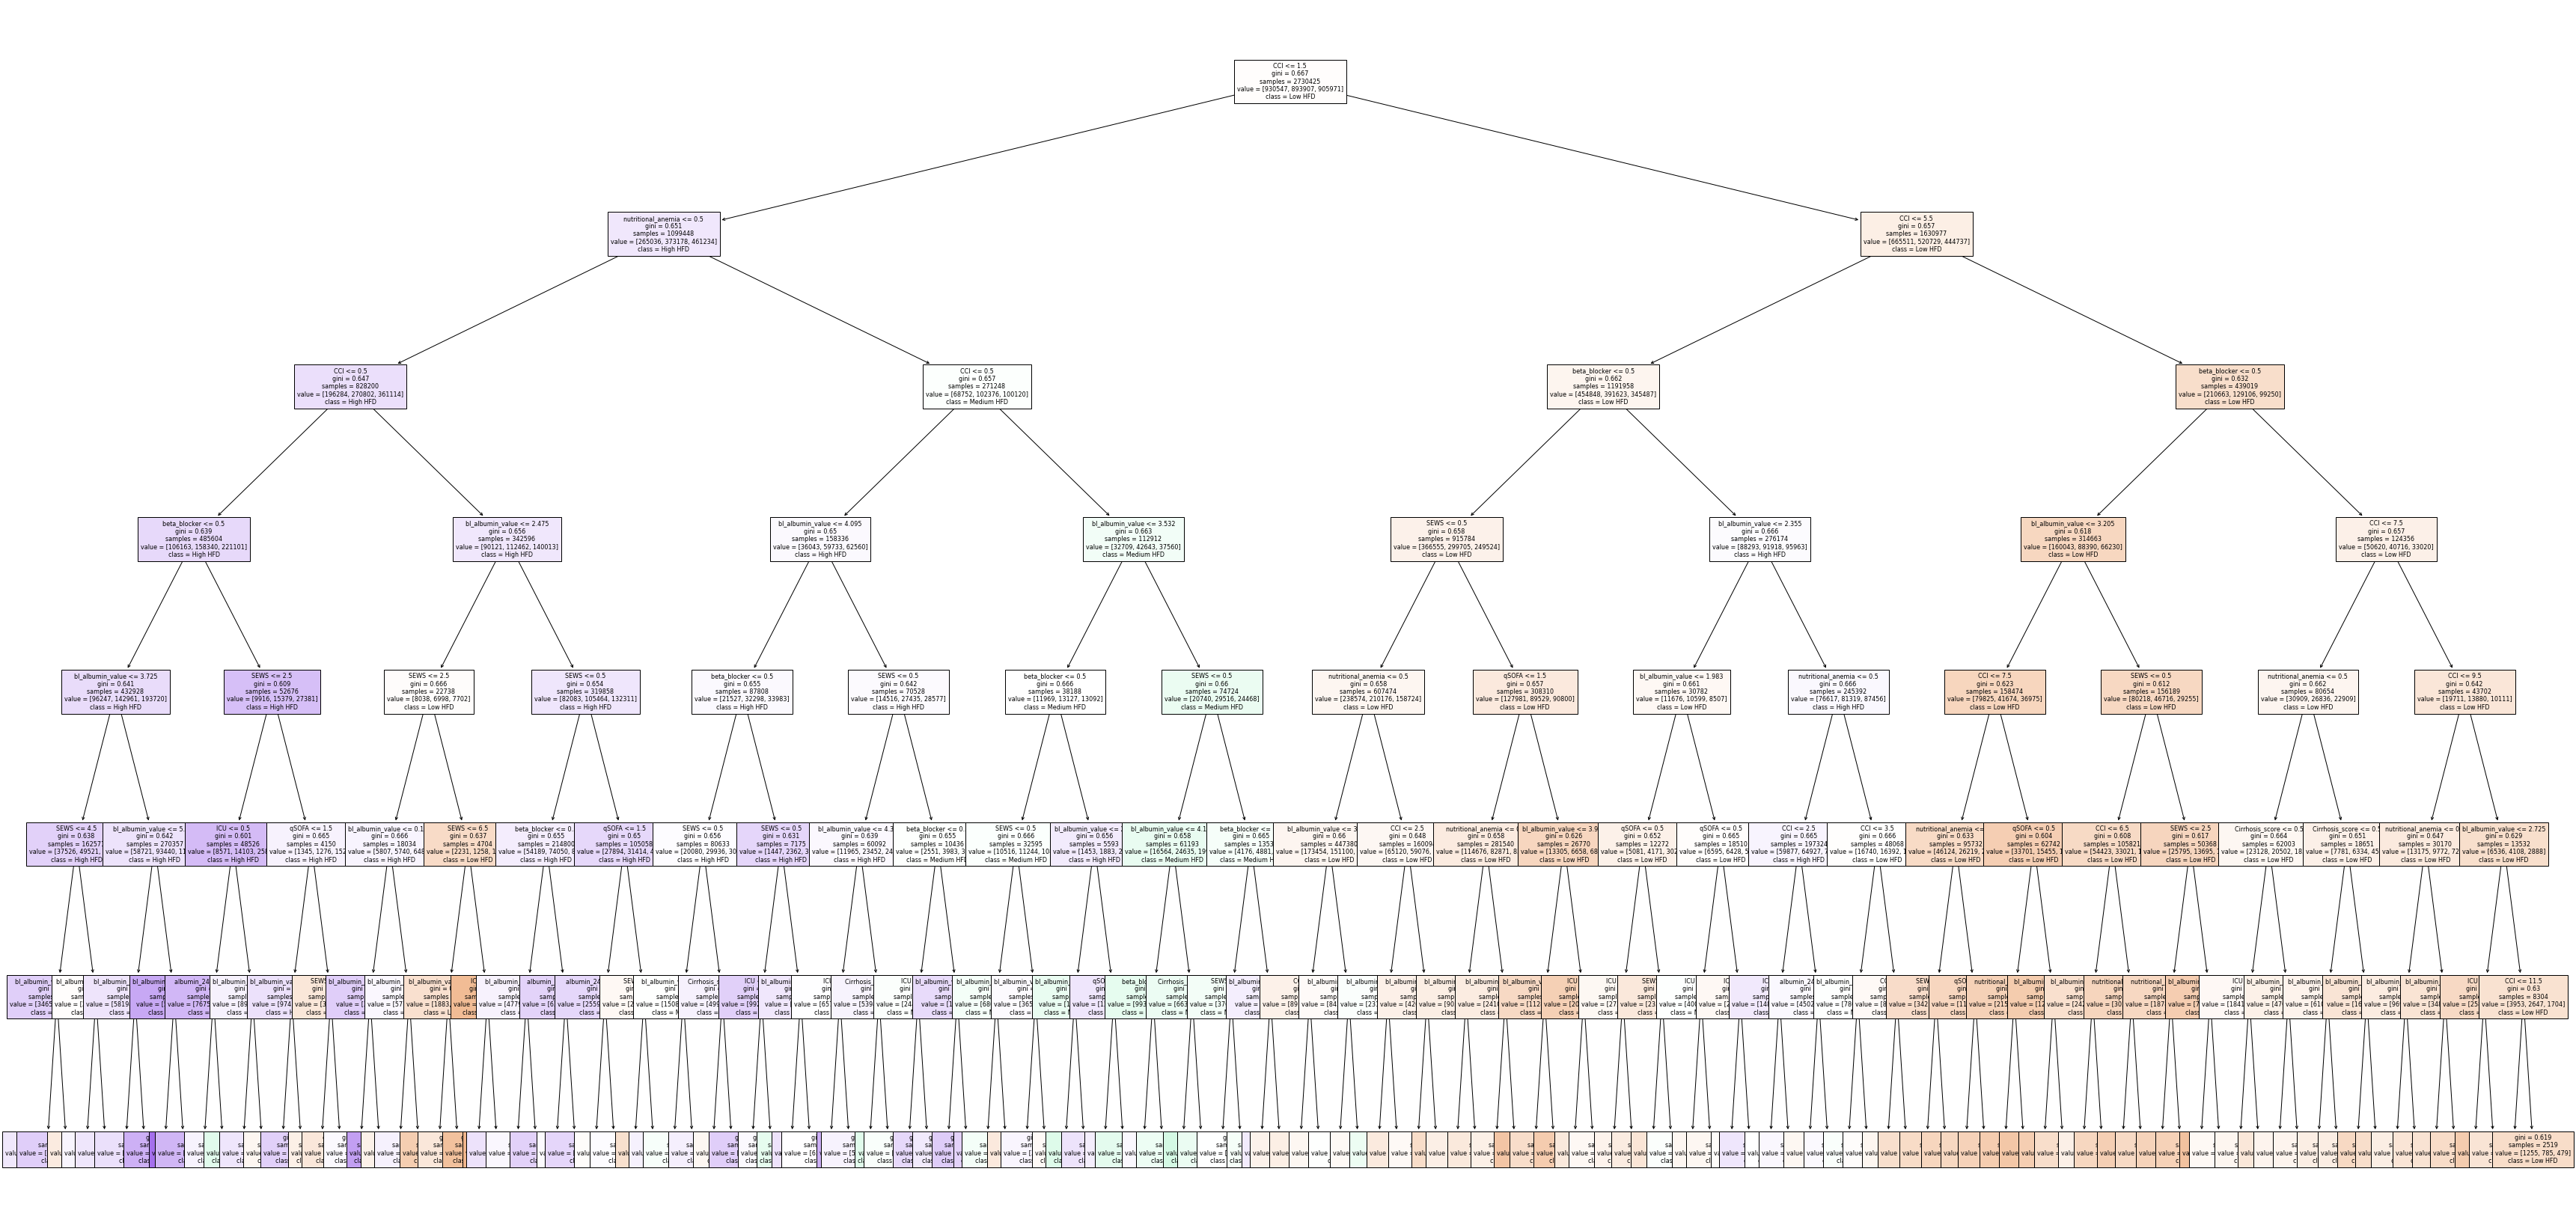

In [87]:
feature_names = X_train.columns.tolist()
class_names = ['Low HFD', 'Medium HFD', 'High HFD']

fig = plt.figure(figsize=(60,30))
_ = tree.plot_tree(dt,
                   fontsize=8,
                   feature_names=feature_names,  
                   class_names=class_names,
                   filled=True)

In [147]:
dot_data = tree.export_graphviz(dt, out_file=None, 
                     feature_names=feature_names,  
                     class_names=class_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.write_png('HFD_DT_D8_MATCHED_178K.png')

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.738112 to fit



True

## 6: Decision Tree 

In [88]:
# instantiate a decision tree model
# max_depth limits depth of tree, helps prevent overfitting training data
# max_depth 5
dt = tree.DecisionTreeClassifier(max_depth=8, min_samples_leaf=100)
# fit the model to X and y training sets
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=100)

Feature: albumin_24_hours Score: 0.00443
Feature: ICU Score: 0.01099
Feature: CCI Score: 0.72755
Feature: bl_albumin_value Score: 0.06310
Feature: albumin_lab_baseline_severity Score: 0.00000
Feature: qSOFA Score: 0.01141
Feature: beta_blocker Score: 0.08583
Feature: Cirrhosis_score Score: 0.00615
Feature: nutritional_anemia Score: 0.04700
Feature: SEWS Score: 0.04353


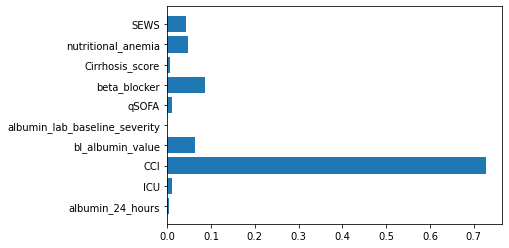

In [89]:
# get importance from decision tree model
importance = dt.feature_importances_
# summarize feature importance
labels = []
for i,v in enumerate(importance):
    print('Feature: %s Score: %.5f' % (cols[i], v))
    labels.append(cols[i])
# plot feature importance
pyplot.barh(labels, importance)
pyplot.show()

In [90]:
# generate model prediction data for train and test sets
y_hat_train = dt.predict(X_train)
y_hat_test = dt.predict(X_test)

In [91]:
# confusion_matrix for actual y_train and predicted y_train
cnf_matrix = confusion_matrix(y_train, y_hat_train)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[579087  89793 261667]
 [422619 117378 353910]
 [346814  99497 459660]]


In [92]:
# model metrics for train set (Precision, Recall, Accuracy, F1)
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

           0       0.43      0.62      0.51    930547
           1       0.38      0.13      0.20    893907
           2       0.43      0.51      0.46    905971

    accuracy                           0.42   2730425
   macro avg       0.41      0.42      0.39   2730425
weighted avg       0.41      0.42      0.39   2730425



In [93]:
# confusion_matrix for actual y_test and predicted y_test
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[144779  22661  65642]
 [105858  29153  88368]
 [ 86905  24722 114519]]


In [94]:
# model metrics for test set (Precision, Recall, Accuracy, F1)
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.43      0.62      0.51    233082
           1       0.38      0.13      0.19    223379
           2       0.43      0.51      0.46    226146

    accuracy                           0.42    682607
   macro avg       0.41      0.42      0.39    682607
weighted avg       0.41      0.42      0.39    682607



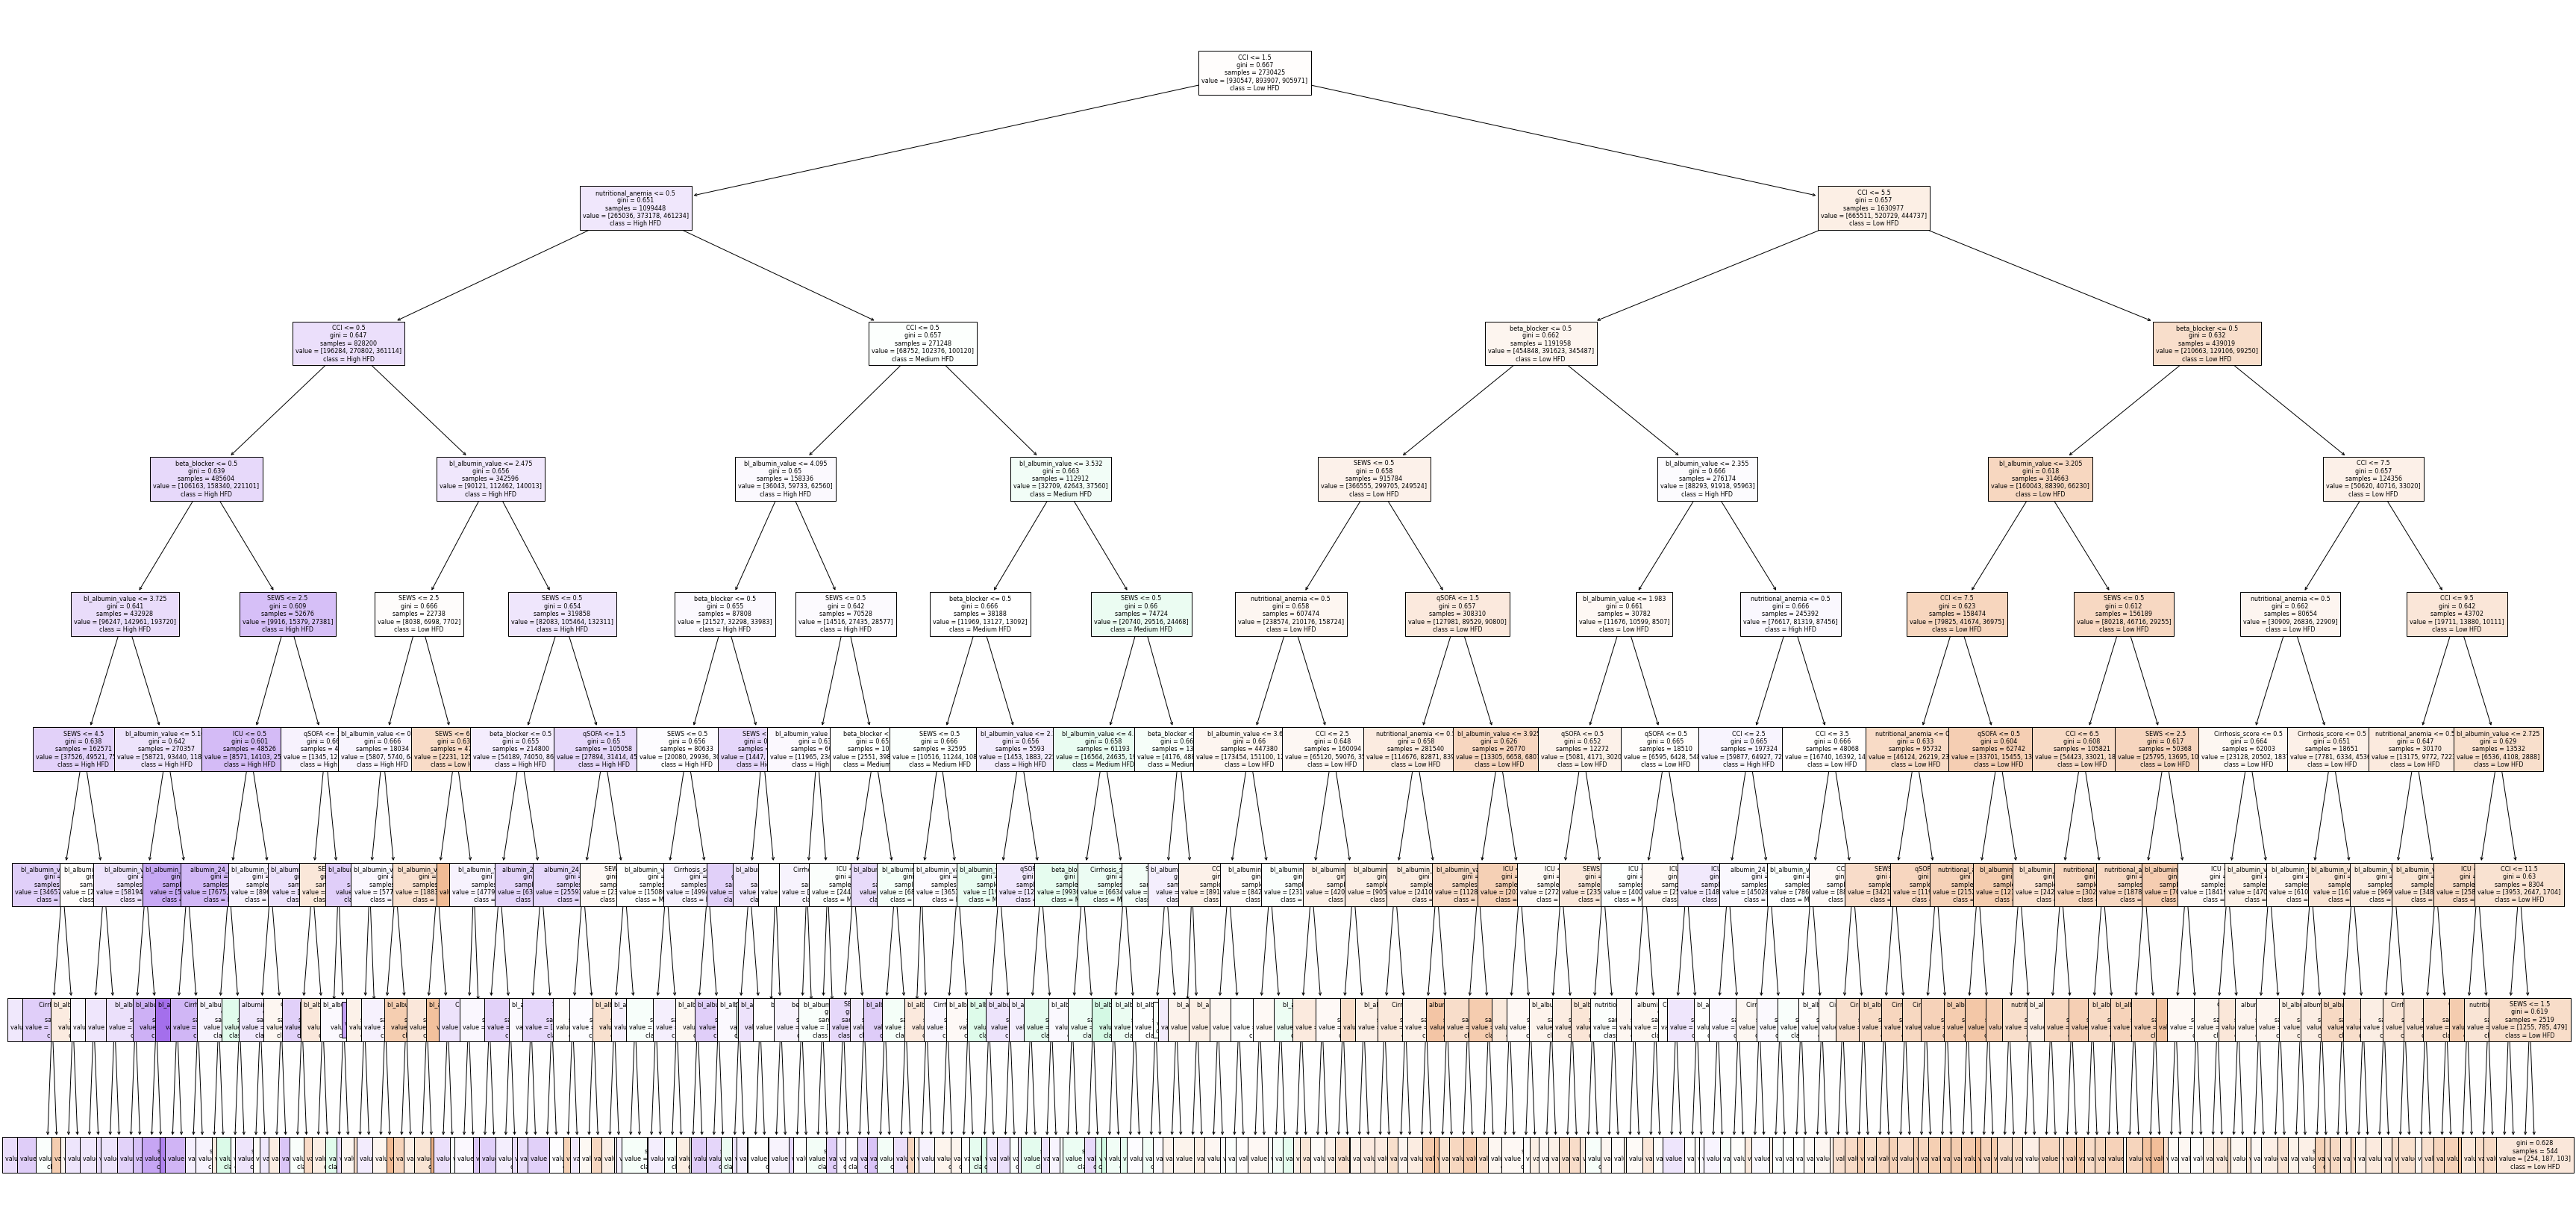

In [95]:
feature_names = X_train.columns.tolist()
class_names = ['Low HFD', 'Medium HFD', 'High HFD']

fig = plt.figure(figsize=(60,30))
_ = tree.plot_tree(dt,
                   fontsize=8,
                   feature_names=feature_names,  
                   class_names=class_names,
                   filled=True)

In [96]:
dot_data = tree.export_graphviz(dt, out_file=None, 
                     feature_names=feature_names,  
                     class_names=class_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.write_png('HFD_DT_D8_UNMATCHED_3M.png')

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.563859 to fit



True

## Random Forest

In [53]:
rf = RandomForestClassifier(max_depth=8, min_samples_leaf=100)
# fit the model to X and y training sets
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, min_samples_leaf=100)

In [54]:
# generate model prediction data for train and test sets
y_hat_train = rf.predict(X_train)
y_hat_test = rf.predict(X_test)

In [55]:
# confusion_matrix for actual y_train and predicted y_train
cnf_matrix = confusion_matrix(y_train, y_hat_train)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[ 42478   6691  29106]
 [ 27499   9425  54026]
 [ 19704   6073 109965]]


In [56]:
# model metrics for train set (Precision, Recall, Accuracy, F1)
print(classification_report(y_train, y_hat_train))

              precision    recall  f1-score   support

           0       0.47      0.54      0.51     78275
           1       0.42      0.10      0.17     90950
           2       0.57      0.81      0.67    135742

    accuracy                           0.53    304967
   macro avg       0.49      0.49      0.45    304967
weighted avg       0.50      0.53      0.48    304967



In [57]:
# confusion_matrix for actual y_test and predicted y_test
cnf_matrix = confusion_matrix(y_test, y_hat_test)
print('Confusion Matrix: \n', cnf_matrix)

Confusion Matrix: 
 [[10737  1690  7277]
 [ 6864  2400 13411]
 [ 4863  1550 27450]]


In [58]:
# model metrics for test set (Precision, Recall, Accuracy, F1)
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.48      0.54      0.51     19704
           1       0.43      0.11      0.17     22675
           2       0.57      0.81      0.67     33863

    accuracy                           0.53     76242
   macro avg       0.49      0.49      0.45     76242
weighted avg       0.50      0.53      0.48     76242



Feature: albumin_24hrs Score: 0.68268
Feature: ICU Score: 0.09195
Feature: CCI Score: 0.04476
Feature: qSOFA Score: 0.05184
Feature: beta_blocker Score: 0.05392
Feature: Cirrhosis_score Score: 0.02860
Feature: nutritional_anemia Score: 0.00242
Feature: SEWS Score: 0.04383


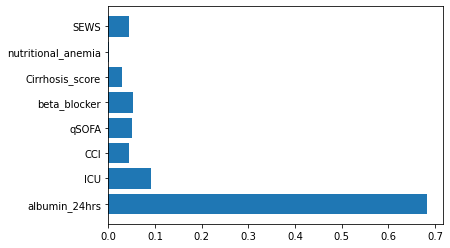

In [59]:
# get importance from decision tree model
importance = rf.feature_importances_
# summarize feature importance
labels = []
for i,v in enumerate(importance):
    print('Feature: %s Score: %.5f' % (cols[i], v))
    labels.append(cols[i])
# plot feature importance
pyplot.barh(labels, importance)
pyplot.show()